# **Women Representation in City Property SanFrancisco**


## Business Understanding

In October of 2018, the Board of Supervisors passed and Mayor London N. Breed signed, the Ordinance 243-18 (http://bit.ly/2LSqS3U) to expand the extent to which women are represented in the public sphere, including within artwork, statues, street names, facilities, parks, and more. The representation of women in City-owned buildings includes buildings, conference rooms, clubhouses, museums, recreation centers, community rooms, auditoriums, terminals, departure halls, 7 staircases, rooms, and other places open to the public. The City Administrator's office was responsible for compiling a list of all city owned buildings named after a man or woman. You can read the accompanying report on the representation of women in city property here: http://bit.ly/2YIDCz7

## Specifying the Data Analytic Question

Analyze the representation of women in City-owned buildings open to public in SanFrancisco


## Reading the data

In [3]:
#import pandas
import pandas as pd
#import numpy
import numpy as np
#import matplotlib
import matplotlib.pyplot as plt
#import seaborn
import seaborn as sns

In [4]:
#read the dataset and view th first five rows
df = pd.read_csv('WomenRepresentaionInCityProperty-SanFrancisco.csv')
df.head()

,Department/Source,Name,Person,Gender,Reference,Comments,Current Police Districts,Current Supervisor Districts,Analysis Neighborhoods,Neighborhoods,SF Find Neighborhoods
0,Administrator,MOSCONE CENTER (South),George R. Moscone,M,City Administrator,NaN,4,10,36,21,21
1,Administrator,Maxine Hall Health Center,NaN,F,Public Health,NaN,4,10,36,21,21
2,REC AND PARKS,Moscone Recreation Center,George R. Moscone,M,NaN,park,4,10,36,21,21
3,REC AND PARKS,"Helen Crocker Russell Library of Horticulture,...",Helen Crocker,F,NaN,facilities and other amenities,4,10,36,21,21
4,REC AND PARKS,"Sharon Building, Golden Gate Park",Sharon Building,M,NaN,facilities and other amenities,4,10,36,21,21


In [5]:
#view the last five rows
df.tail()

,Department/Source,Name,Person,Gender,Reference,Comments,Current Police Districts,Current Supervisor Districts,Analysis Neighborhoods,Neighborhoods,SF Find Neighborhoods
77,Administrator,MOSCONE CENTER Parking Garage,George R. Moscone,M,Municipal Transportation Agency,NaN,4,10,36,21,21
78,RED,"City Hall, 2nd Floor, Buck Delventhal Rotunda",Buck Delventhal,M,Longtime Deputy City Attorney,NaN,4,10,36,21,21
79,PUC,Alex Pitcher Community Room,"Alex Pitcher, Jr.",M,NaN,Civil Rights Attorney,4,10,36,21,21
80,Administrator,Curtis E. Green LRV Facility Annex Bldg,Curtis E. Green,M,Municipal Transportation Agency,NaN,4,10,36,21,21
81,Administrator,Bill Graham Civic Auditorium,Bill Graham,M,City Administrator,NaN,4,10,36,21,21


## Checking the data

In [6]:
#rows and columns
df.shape

(82, 11)

In [7]:
#columns in the dataset
column_names= df.columns
column_names

Index(['Department/Source', 'Name', 'Person', 'Gender', 'Reference',
       'Comments', 'Current Police Districts', 'Current Supervisor Districts',
       'Analysis Neighborhoods', 'Neighborhoods', 'SF Find Neighborhoods'],
      dtype='object')

In [8]:
#dataset information
df.info

<bound method DataFrame.info of    Department/Source  ... SF Find Neighborhoods
0      Administrator  ...                    21
1      Administrator  ...                    21
2      REC AND PARKS  ...                    21
3      REC AND PARKS  ...                    21
4      REC AND PARKS  ...                    21
..               ...  ...                   ...
77     Administrator  ...                    21
78               RED  ...                    21
79               PUC  ...                    21
80     Administrator  ...                    21
81     Administrator  ...                    21

[82 rows x 11 columns]>

In [9]:
#datatypes of the columns
df.dtypes

Department/Source               object
Name                            object
Person                          object
Gender                          object
Reference                       object
Comments                        object
Current Police Districts         int64
Current Supervisor Districts     int64
Analysis Neighborhoods           int64
Neighborhoods                    int64
SF Find Neighborhoods            int64
dtype: object

In [10]:
#diplaying the unique values of columns
for column in column_names:
  print(column)
  print(df[column].nunique())
  print(df[column].unique())
  print('...........................................................')

Department/Source
8
['Administrator' 'REC AND PARKS' 'AIRPORT' 'PUC' 'LIBRARY' 'SFMTA' 'Port'
 'RED']
...........................................................
Name
82
['MOSCONE CENTER (South)' 'Maxine Hall Health Center'
 'Moscone Recreation Center'
 'Helen Crocker Russell Library of Horticulture, Golden Gate Park'
 'Sharon Building,  Golden Gate Park'
 'Priscilla Chan and Mark Zuckerberg San Francisco General Hospital and Trauma Center'
 'Fay Park Garage' 'Minnie & Lovie Ward Recreation Center'
 'Stanford Chlorine Plant' 'Berman Reflection Room'
 'De Young Museum,  Golden Gate Park'
 'Lou Spadia Clubhouse, Jackson Playground'
 'Betty Ann Ong Chinese Recreation Center'
 'Curtis E. Green LRV Facility Geneva Site' 'Wattis Founders Room'
 'O’Shaughnessy CONF ROOM'
 'Eureka Valley Branch Library/ Harvey Milk Memorial Branch Library'
 'Richmond/Senator Milton Marks Branch Library'
 'Elsa Strait Room, Eureka Valley Recreation Center'
 "Elizabeth Murray Performers'  Lounge" 'H. WELTON FLYN

In [11]:
#identifying the columns with numerical data
df._get_numeric_data().columns

Index(['Current Police Districts', 'Current Supervisor Districts',
       'Analysis Neighborhoods', 'Neighborhoods', 'SF Find Neighborhoods'],
      dtype='object')

In [12]:
#statistical  description of the dataset
df.describe()

,Current Police Districts,Current Supervisor Districts,Analysis Neighborhoods,Neighborhoods,SF Find Neighborhoods
count,82.0,82.0,82.0,82.0,82.0
mean,4.0,10.0,36.0,21.0,21.0
std,0.0,0.0,0.0,0.0,0.0
min,4.0,10.0,36.0,21.0,21.0
25%,4.0,10.0,36.0,21.0,21.0
50%,4.0,10.0,36.0,21.0,21.0
75%,4.0,10.0,36.0,21.0,21.0
max,4.0,10.0,36.0,21.0,21.0


## Tidying the dataset

In [13]:
#checking the sum of the duplicated rows
sum(df.duplicated())

0

In [14]:
#checking for null values
df.isnull().sum()

Department/Source                0
Name                             0
Person                           1
Gender                           0
Reference                       28
Comments                        50
Current Police Districts         0
Current Supervisor Districts     0
Analysis Neighborhoods           0
Neighborhoods                    0
SF Find Neighborhoods            0
dtype: int64

Column Person, reference and comments have null values but since we are not creating any model, we are going to work with it the way it is. Again, removing the null values will reduce the amount of data significantly

# Exploratory Data Analysis

## Univariate Analysis

In [16]:
#statistical analysis eg the mean, count, standard deviation etc
df.describe()

,Current Police Districts,Current Supervisor Districts,Analysis Neighborhoods,Neighborhoods,SF Find Neighborhoods
count,82.0,82.0,82.0,82.0,82.0
mean,4.0,10.0,36.0,21.0,21.0
std,0.0,0.0,0.0,0.0,0.0
min,4.0,10.0,36.0,21.0,21.0
25%,4.0,10.0,36.0,21.0,21.0
50%,4.0,10.0,36.0,21.0,21.0
75%,4.0,10.0,36.0,21.0,21.0
max,4.0,10.0,36.0,21.0,21.0


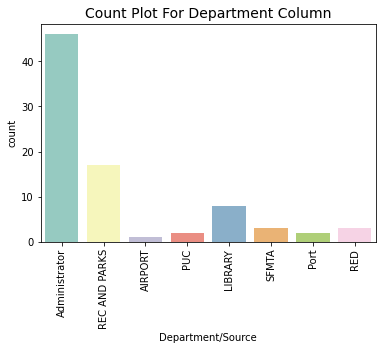

In [18]:
#Count plot for department column
ax = sns.countplot(x="Department/Source", data=df, palette = 'Set3')
plt.xticks(rotation=90)
ax.set_title('Count Plot For Department Column', fontsize=14)
plt.show()


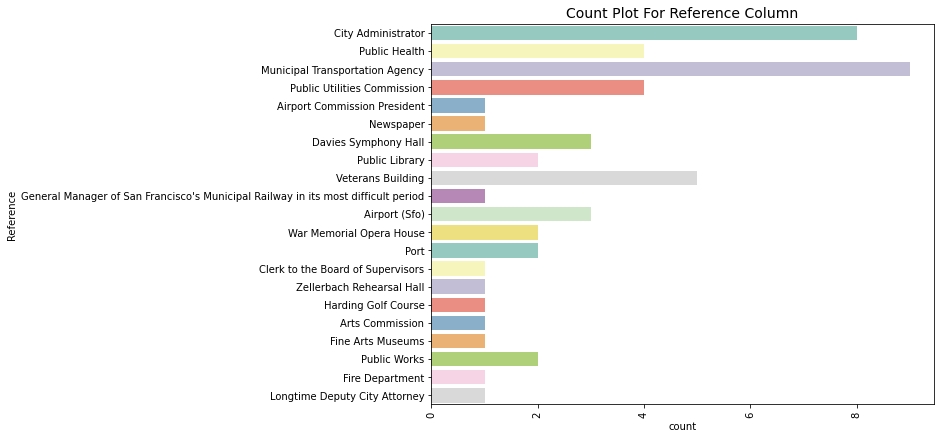

In [96]:
#Count plot for reference column
fig = plt.figure(figsize = (9,7))
ax = sns.countplot(y="Reference", data=df, palette = 'Set3')
plt.xticks(rotation=90)
ax.set_title('Count Plot For Reference Column', fontsize=14)
plt.show()

Municipal Transportation Agency has majority of the buildings, followed by City Administrator



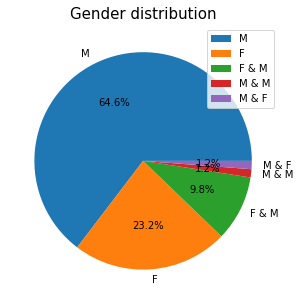

In [63]:

#pie chart shwoing the distribution of gender in the dataset
pie, ax = plt.subplots(figsize = [5,5])
x=np.array(df['Gender'].value_counts())
labels = df['Gender'].value_counts().keys()
plt.pie( x = x, labels= labels,  autopct= "%.1f%%")
plt.title('Gender distribution', fontsize = 15)
plt.legend()
plt.show()


* male names are mostly used to name building accounting for 64.6 % of the building names

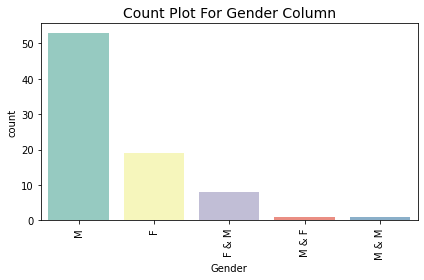

In [21]:
#count plot for the gender column
ax = sns.countplot(x="Gender", data=df,palette = 'Set3')
plt.xticks(rotation=90)
ax.set_title('Count Plot For Gender Column', fontsize=14)
plt.tight_layout()

In [32]:
#replace 'M & M' with 'M' since facilitiy is named after the male gender
df1 =df[(df['Gender']!='F & M') & (df['Gender']!='M & F')]
df1["Gender"].value_counts()

M        53
F        19
M & M     1
Name: Gender, dtype: int64

In [51]:
#croscheck  to see if the replacement has been effected
df2 = df1.replace({"Gender":{'M & M' : 'M'}})
gender =df2['Gender'].value_counts()
gender_df = gender.to_frame()
gender_df

,Gender
M,54
F,19


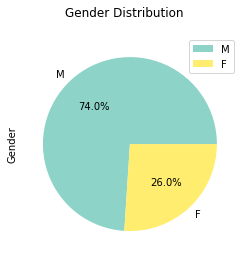

In [69]:
gender_df.plot(kind = 'pie', autopct='%1.1f%%', colormap = 'Set3', title = 'Gender Distribution', subplots = True )
plt.show()

this shows a very huge disparity between gender

## Bivariate  Analysis

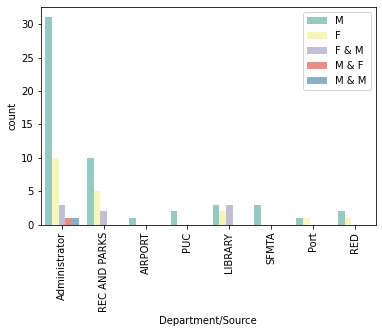

In [22]:
#how the gender is distributed in the department
sns.countplot(x = "Department/Source", hue = "Gender", data = df, palette= 'Set3')
plt.xticks(rotation = 90)
plt.legend(loc = 'upper right')
plt.show()


* There is gender equality in Port Department
* There is a very high gender disparity in the Administrator department
* Airport, PUC an SFMTA do not have females




The gender column has entries with multiple people whose names have bee used. Our main question for the analysis is to analyse the representation of women in City-owned buildings open to public. Therefore it is irrelevant for us to use entries with both female and male. As a result, i will drop the rows with F & M.


In [26]:
#check whether a person's name has been used more than once to name a building
duplicated_df = df2[df2.duplicated(['Person'] , keep = False)]
print(duplicated_df.count() )
duplicated_df

Department/Source               18
Name                            18
Person                          18
Gender                          18
Reference                       16
Comments                         3
Current Police Districts        18
Current Supervisor Districts    18
Analysis Neighborhoods          18
Neighborhoods                   18
SF Find Neighborhoods           18
dtype: int64


,Department/Source,Name,Person,Gender,Reference,Comments,Current Police Districts,Current Supervisor Districts,Analysis Neighborhoods,Neighborhoods,SF Find Neighborhoods
0,Administrator,MOSCONE CENTER (South),George R. Moscone,M,City Administrator,NaN,4,10,36,21,21
2,REC AND PARKS,Moscone Recreation Center,George R. Moscone,M,NaN,park,4,10,36,21,21
10,REC AND PARKS,"De Young Museum, Golden Gate Park",M. H. de Young,M,Newspaper,facilities and other amenities,4,10,36,21,21
13,Administrator,Curtis E. Green LRV Facility Geneva Site,Curtis E. Green,M,Municipal Transportation Agency,NaN,4,10,36,21,21
16,Administrator,Eureka Valley Branch Library/ Harvey Milk Memo...,Harvey Milk,M,Public Library,NaN,4,10,36,21,21
20,Administrator,H. WELTON FLYNN DIV.,H. Welton Flynn,M,Municipal Transportation Agency,NaN,4,10,36,21,21
22,Administrator,Flynn Tire Shop,H. Welton Flynn,M,Municipal Transportation Agency,NaN,4,10,36,21,21
31,REC AND PARKS,"Harvey Milk Center for Recreational Arts, Dubo...",Harvey Milk,M,NaN,facilities and other amenities,4,10,36,21,21
38,Administrator,Harvey Milk Terminal - Terminal 1,Harvey Milk,M,Airport (Sfo),NaN,4,10,36,21,21
42,Administrator,Moscone West,George R. Moscone,M,City Administrator,NaN,4,10,36,21,21


In [27]:
#diplay the names of the person that have been used more than once
duplicated_df['Person'].unique()

array(['George R. Moscone', 'M. H. de Young', 'Curtis E. Green',
       'Harvey Milk', 'H. Welton Flynn', 'J. M. Woods'], dtype=object)

* all these  6 are male
* majority are from administrator department

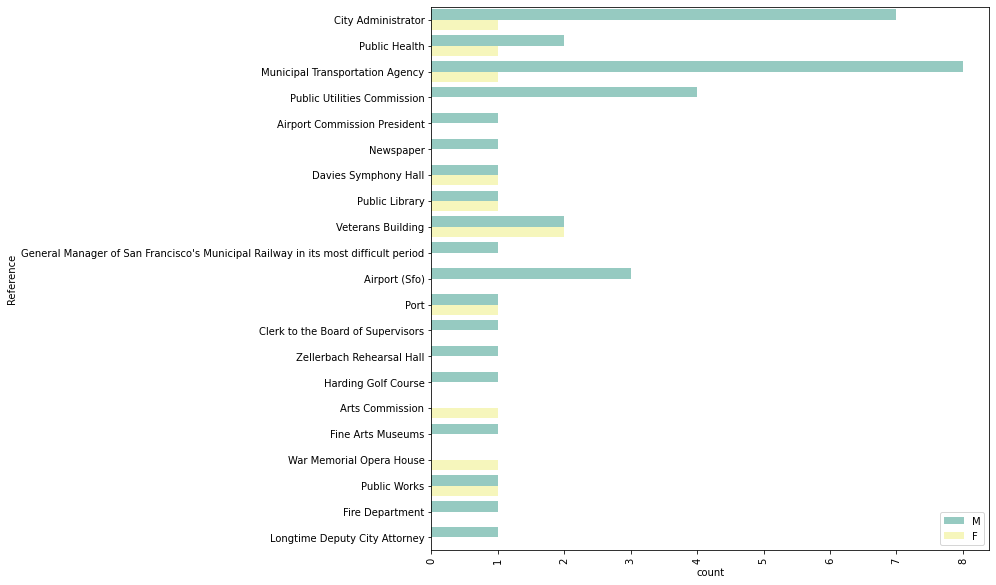

In [81]:
#gender distribution according to references
fig = plt.figure(figsize = (10,10))
ax = sns.countplot(y = "Reference", hue = "Gender", data = df2, palette= 'Set3')
plt.xticks(rotation = 90)
plt.legend(loc = 'lower right')
plt.show()

The following list of type of buildings have well representation of both genders:
* Davies Symphony Hall, 
* Public Library,
* Veterans Building, 
* Port, 
* Pulic works 
Arts commision and War memorial Opera House are represented by female names only

**We can therefore say with certainty that female representaion in the naming of buildings in San Frasisco is low compared to that of Male**